In [1]:
from fastai.vision import *
from fastai import *
from fastai.callbacks import CSVLogger, SaveModelCallback
import torch
import pandas as pd

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Mini_Project_Sem_5_second/Dataset/UCMerced/multilabels.txt", sep="\t")
class_count = pd.DataFrame(df.sum(axis=0)).reset_index()
class_count.columns = ["class", "Count"]
class_count.drop(class_count.index[0], inplace=True)

##Training

In [3]:
path =  Path("/content/drive/MyDrive/Mini_Project_Sem_5_second/Dataset/UCMerced")
data_src = (ImageList.from_df(df=df, path=path, folder='images', suffix=".tif")
            .split_by_rand_pct(0.2)
            .label_from_df(cols=list(class_count['class']), label_cls=MultiCategoryList, one_hot=True))

In [4]:
tfms = get_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.)

In [5]:
data = (data_src.transform(tfms, size=256).databunch().normalize(imagenet_stats))

In [6]:
f_score = partial(fbeta, thresh=0.45)
learn = cnn_learner(data, models.resnet34, metrics=[accuracy_thresh, f_score],
                    callback_fns=[ShowGraph, SaveModelCallback])

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

In [7]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 3.98E-02
Min loss divided by 10: 3.02E-02


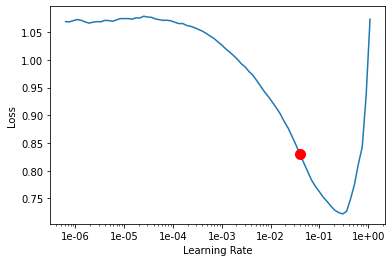

In [10]:
learn.recorder.plot(suggestion = True)      # When suggestion is set to true then only the learner will suggest the min_grad_lr
min_grad_lr = learn.recorder.min_grad_lr

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.538437,0.280705,0.905322,0.692461,00:23
1,0.332470,0.321016,0.889636,0.783308,00:22
2,0.252234,0.143877,0.941457,0.850886,00:22
3,0.195320,0.108528,0.951541,0.901857,00:23
4,0.157157,0.105355,0.952381,0.901653,00:22


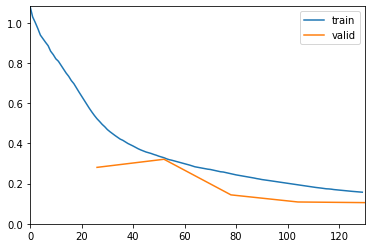

Better model found at epoch 0 with valid_loss value: 0.28070518374443054.
Better model found at epoch 2 with valid_loss value: 0.14387689530849457.
Better model found at epoch 3 with valid_loss value: 0.10852763801813126.
Better model found at epoch 4 with valid_loss value: 0.1053551658987999.


In [11]:
learn.fit_one_cycle(5, min_grad_lr)

In [12]:
learn.freeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.31E-07
Min loss divided by 10: 1.32E-03


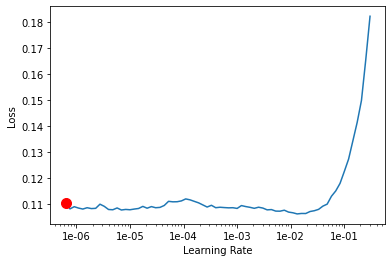

In [13]:
learn.lr_find()
learn.recorder.plot(suggestion = True)
min_grad_lr = learn.recorder.min_grad_lr

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.107206,0.105454,0.952801,0.901732,00:22
1,0.108865,0.104767,0.952381,0.900567,00:23
2,0.106925,0.105123,0.952941,0.902730,00:22
3,0.108513,0.104818,0.953361,0.900864,00:22
4,0.107295,0.104372,0.952241,0.903056,00:22


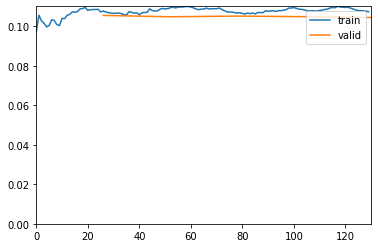

Better model found at epoch 0 with valid_loss value: 0.10545440018177032.
Better model found at epoch 1 with valid_loss value: 0.1047673374414444.
Better model found at epoch 4 with valid_loss value: 0.10437234491109848.


In [14]:
lr = min_grad_lr
learn.fit_one_cycle(5, slice(lr))

In [15]:
learn.save('/content/drive/MyDrive/Mini_Project_Sem_5_second/')

In [17]:
learn.path  # Model Will be Saved Here 

PosixPath('/content/drive/MyDrive/Mini_Project_Sem_5_second/Dataset/UCMerced')

In [18]:
learn.export('New_Model_using_suggestion.pkl')